En esta segunda parte del trabajo se pide analizar si es posble agrupar los datos en función de algún criterio. Usaremos el algoritmo de K-Means.

Importamos las librerias:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from pyclustertend import hopkins

## Agrupamiento

En este tipo de problemas se trata de agrupar los datos. Agruparlos de tal
forma que queden definidos N conjuntos distinguibles, aunque no
necesariamente se sepa qué signifiquen esos conjuntos.
El agrupamiento siempre será por características similares.
En esta ocasión se nos pide analizar si es posible agrupar los datos en función de algún criterio utilizando el algoritmo K-Means


#### Algoritmo de K-Means

- PASO 1: Elegir la cantidad de clusters $k$
- PASO 2: Elige al azar un centroide para cada clúster (no necesariamente un punto del data set)
- PASO 3: El algoritmo asigna cada punto al centroide más cercano para obtener clústeres iniciales
- PASO 4: Para cada clúster, el algoritmo recalcula el centroide mediante el promedio de todos los puntos del clúster
- PASO 5: K-Means vuelve a reasignar los puntos usando los nuevos centroides. Calcula nuevos
grupos
- PASO 6: El algoritmo repite el cálculo de los centroides y la asignación de puntos hasta que estos dejen de cambiar de clúster

K-Means posee diferentes hiper-parámetros que se pueden configurar:

- init: es el método de inicialización de los centroides. En este caso definimos random para que se seleccionen aleatoriamente los puntos. PREGUNTARRRRRRRRRRRRR!!!!!!!!1111

- n_clusters: definine la cantidad N de clústers que queremos como resultado.

- random_state: es la semilla de la aleatorización. En este tp la fijamos para que los resultados sean reproducibles.

Importamos de vuelta la database despues del preprocesamiento

In [5]:
ds_properati = pd.read_csv('nuevo_dataset_properati.csv')    

#### Cómo determinar la tendencia al agrupamiento

La estadística de Hopkins (Lawson y Jurs 1990) se utiliza para evaluar la tendencia de agrupación de un
conjunto de datos midiendo la probabilidad de que un conjunto de datos dado sea generado por una
distribución de datos uniforme.
En otras palabras, prueba la aleatoriedad espacial de los datos.
La idea es comparar una muestra cualquiera con una muestra uniforme (creada de forma aleatoria) y ver
cómo se distribuyen los ejemplos (los puntos) en dicho espacio.

Funcionamiento: Sea D un conjunto de datos reales:
- PASO 1: Tomar una muestra uniformemente de n puntos $(p_1,..., p_n)$ de D
- PASO 2: Calcular la distancia ($x_i$) de cada punto real a cada vecino más cercano
- PASO 3: Generar un conjunto de datos simulados (randomD) extraído de una distribución uniforme aleatoria con n puntos ($q_1,...,q_n$) y la misma variación que el conjunto de datos reales original D
- PASO 4: Calcular la distancia ($y_i$) desde cada punto artificial hasta el punto de datos real más cercano
- PASO 5: Calcular la estadística de Hopkins (H) como: la distancia media del vecino más cercano en el conjunto de datos
aleatorios dividida por la suma de las distancias medias del vecino más cercano en el conjunto de datos real y simulado.

$H = \frac{\sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} y_i+\sum_{i=1}^{n} x_i}$

Si D está distribuida de forma uniforme, entonces ∑ xi y ∑ yi serían muy parecidos, entonces H sería aproximadamente 1⁄2 (0.5).

Pero si hay clústeres en D, las distancias de los puntos artificiales ∑ yi serían mucho más grandes que las distancias de los puntos reales: ∑ xi y por lo tanto H sería mayor que 0.5.

Un valor de H superior a 0,75 indica una tendencia a la agrupación en un nivel de confianza del 90 %.

Importamos las librerias necesarias:

In [6]:
!pip install llvmlite --ignore-installed

!pip install pyclustertend
from pyclustertend import hopkins
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

Defaulting to user installation because normal site-packages is not writeable
  Using cached llvmlite-0.39.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


Analizamos la tendencia al clustering del dataset:

In [7]:
ds_properati.head()

,Unnamed: 0,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,geometry
0,0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD,POINT (-58.416825 -34.6316207)
1,1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD,POINT (-58.4127457 -34.6238858)
2,2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD,POINT (-58.4230558 -34.6255875)
3,3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD,POINT (-58.425852 -34.629398)
4,4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD,POINT (-58.4200194 -34.6265951)


In [8]:
ds_properati.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:

ds_properati_numerico = ds_properati.select_dtypes(include=np.number)
hopkins(ds_properati_numerico,ds_properati_numerico.shape[0])

0.007215891214832774

Vemos que no tiene una tendencia al agrupamiento

#### ¿Cuántos conjuntos elegir?

Las métricas mas extendidas en clustering son el método de Elbow y el Índice de Silueta.

- El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error (SSE) para varias cantidades de clusters y verificar cual es el que brinda un mejor agrupamiento. En donde el gráfico presenta un "codo" (se quiebra la pendiente) es la cantidad de clusters adecuada.

- Coeficiente de Silhouette:

    Cada punto en el conjunto de datos tiene un coeficiente de Silhouette.
    Para calcular este coeficiente necesitamos calcular a(i) y b(i):

    a(i) es la distancia promedio del punto i a cada uno de los puntos de su cluster.

    b(i) es la distancia promedio del punto i a cada uno de los puntos del cluster más cercano a su propio cluster.

    Si a(i) > b(i), i está posiblemente mal clasificado.

    s(i) = b(i) - a(i) / El mayor de (b(i) o a(i))

    s(i) ≈ 1, la observación i está bien asignada a su cluster
   
    s(i) ≈ 0, la observación i está entre dos cluster

    En el peor de los casos s(i) es -1. 

Primero verificamos con el metodo de Elbow.
Corremos el algoritmo de kmeans entre 2 y 14 grupos y analizamos su error

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f310a8bd360>
Traceback (most recent call last):
  File "/home/valentinaadelsflugel/.local/lib/python3.10/site-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/valentinaadelsflugel/.local/lib/python3.10/site-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/home/valentinaadelsflugel/.local/lib/python3.10/site-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /home/valentinaadelsflugel/.local/lib/python3.10/site-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0: cannot open shared object file: No such f

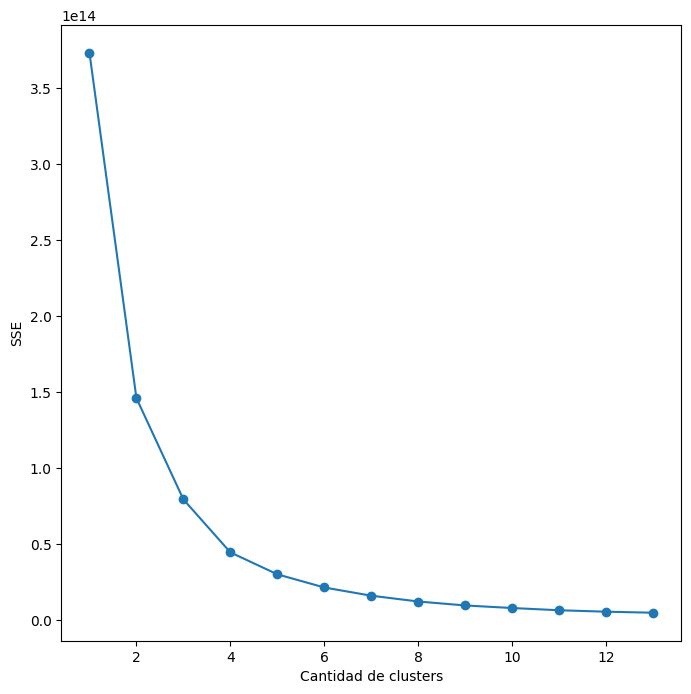

In [10]:
sse = []
list_k = list(range(1, 14))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(ds_properati_numerico)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Podemos observar que para 3 o 4 clusters el gráfico se quiebra.

#### Silhouette

Ahora veremos la calidad de los clusters utilizando un análisis de Silhouette

In [11]:
from sklearn.metrics import silhouette_score

list_k = list(range(3, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preds = clusterer.fit_predict(ds_properati_numerico)
    score = silhouette_score (ds_properati_numerico, preds)
    print ("Para clusters = " + str(n_clusters) + " silhouette es " + str(score))

Para clusters = 3 silhouette es 0.649388830816234
Para clusters = 4 silhouette es 0.5818874621551697
Para clusters = 5 silhouette es 0.5747403657412489


Para k = 3 obtuvimos el mejor score.

In [ ]:
!pip install yellowbrick

Graficamos el coeficiente de silhouette para cada observación y para diferentes valores de k. Lo que se observa de un mismo color corresponde a un mismo cluster y la recta punteada determina el silhouette promedio.

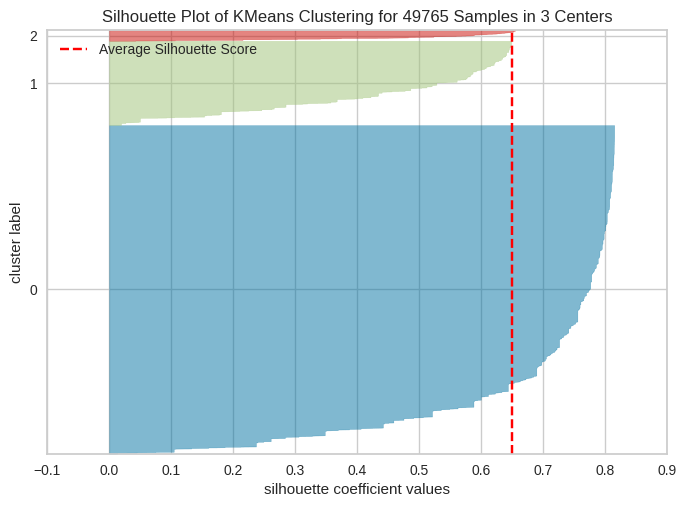

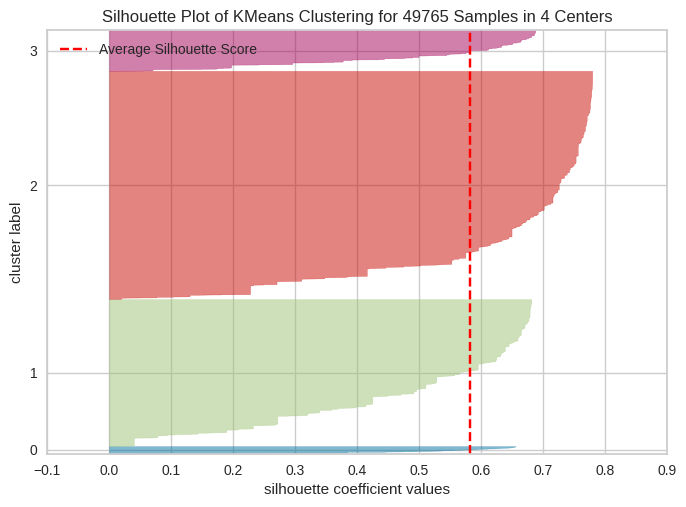

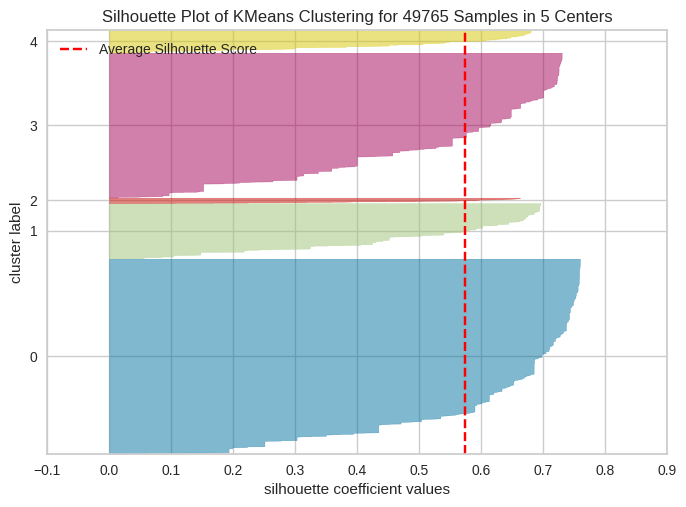

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(3,6): 
    model = KMeans(k, random_state=0)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(ds_properati_numerico)

    plt.title(f'Silhouette con k = {k}')
    visualizer.show()

Volvemos a observar que el mejor resultado fue para k = 3 con un score promedio de aproximadamente 0.65.

Procedemos entonces a realizar el agrupamiento en 3 clusters.

#### Agrupamiento en 3 clusters

Visualizamos los grupos y sus centroides

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(ds_properati_numerico) 

y_kmeans = kmeans.predict(ds_properati_numerico)

In [15]:
ds_properati_numerico.shape[1] #cantidad de columnas del ds

7

Para visualizar los clusters tenemos que hacerlo respecto a un par de variables. Es por esto que lo reptimos para diferentes combinaciones que nos parezcan interesantes y puedan llegar a aportarnos información.

In [55]:
# clusters = []
# def graficar_clusters(index_variable1, index_variable2):
#     c = ['red', 'green', 'blue']
#     for i in range(1,4):
#         filtered_label = ds_properati_numerico[y_kmeans == i]
#         clusters.append(filtered_label)
#         plt.scatter(filtered_label.iloc[:,index_variable1], filtered_label.iloc[:,index_variable2],  color = c[i-1], s=100)
#     centers = kmeans.cluster_centers_
#     plt.scatter(centers[:, index_variable1], centers[:, index_variable2], c='black', s=200, alpha=0.5, marker='.')
#     plt.show()

#     return clusters

Buscamos los indices de las columnas 

In [17]:
for i in range(0,7):
    colname = ds_properati_numerico.columns[i]
    print(i, colname)

0 latitud
1 longitud
2 property_rooms
3 property_bedrooms
4 property_surface_total
5 property_surface_covered
6 property_price


Primer par: PRECIO VS CANTIDAD DE HABITACIONES

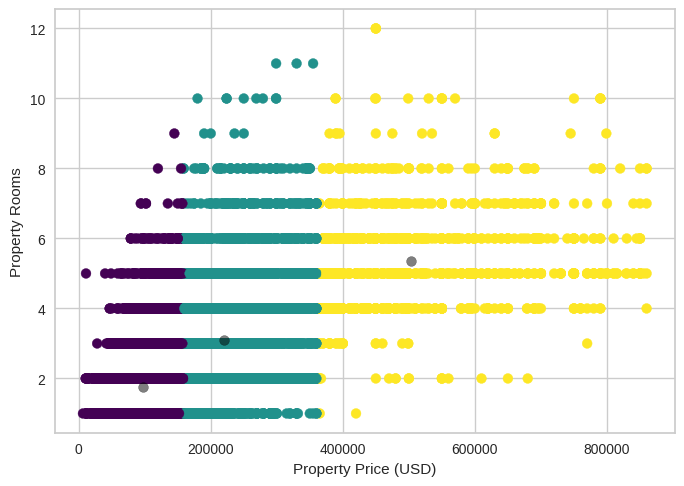

In [62]:
plt.scatter(ds_properati_numerico.iloc[:, 6], ds_properati_numerico.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Rooms")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Segundo par: PRECIO VS BEDROOMS

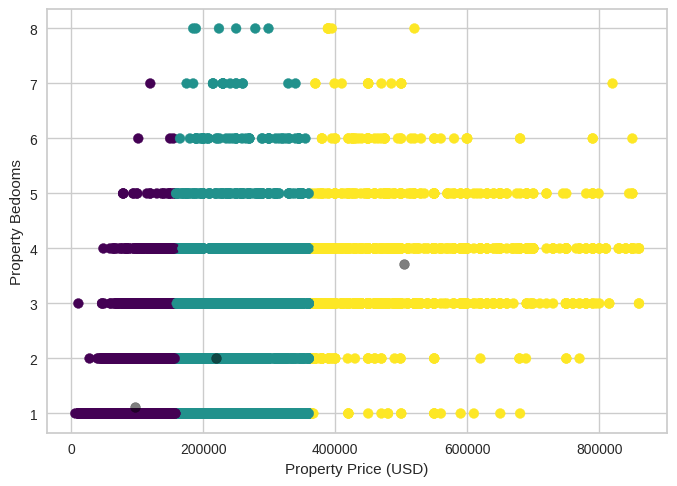

In [63]:
plt.scatter(ds_properati_numerico.iloc[:, 6], ds_properati_numerico.iloc[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Bedooms")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 3], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Tercer par: PRECIO VS SURFACE TOTAL

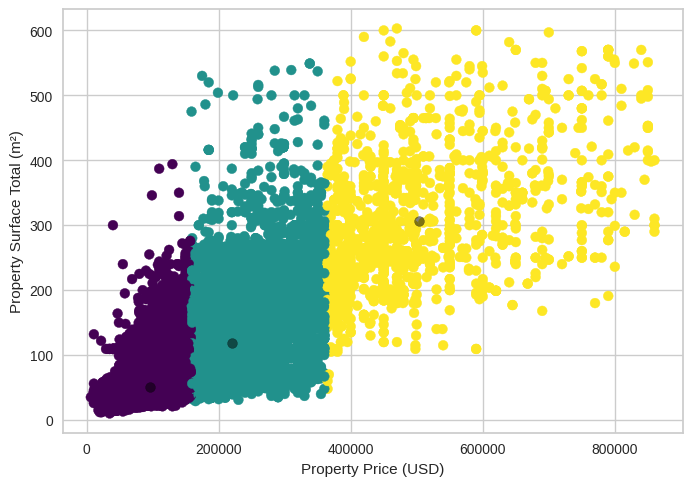

In [64]:
plt.scatter(ds_properati_numerico.iloc[:, 6], ds_properati_numerico.iloc[:, 4], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Surface Total (m²)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Cuarto par: PRECIO VS SURFACE COVERED

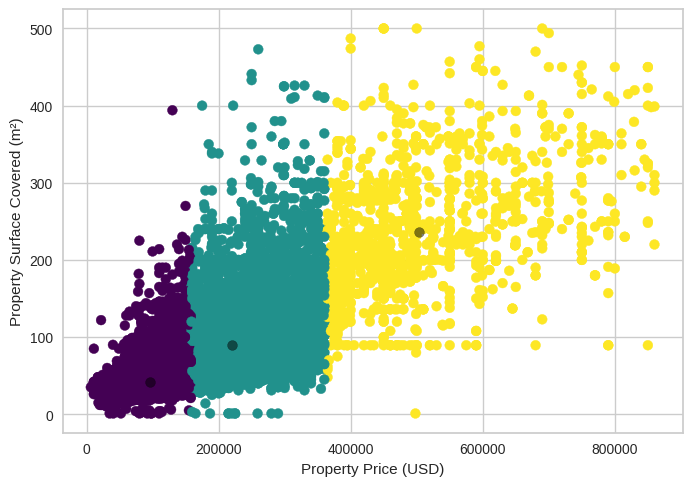

In [65]:
plt.scatter(ds_properati_numerico.iloc[:, 6], ds_properati_numerico.iloc[:, 5], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Price (USD)")
plt.ylabel("Property Surface Covered (m²)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 6], centers[:, 5], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Quinto par: HABITACIONES VS SURFACE COVERED

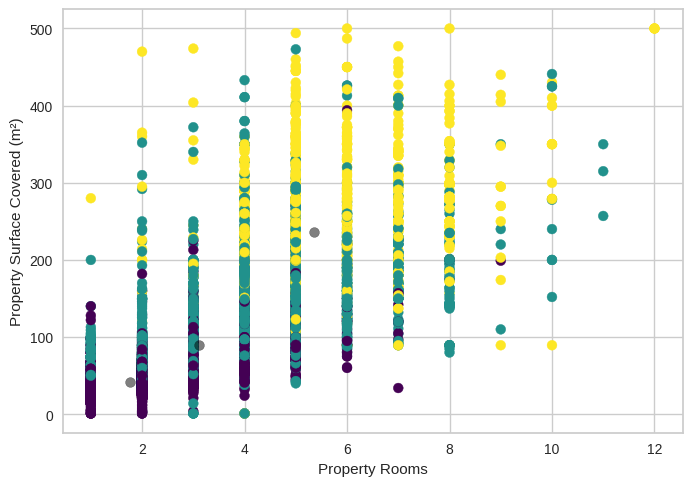

In [66]:
plt.scatter(ds_properati_numerico.iloc[:, 2], ds_properati_numerico.iloc[:, 5], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Property Rooms")
plt.ylabel("Property Surface Covered (m²)")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 5], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Sexto par: HABITACIONES VS SURFACE TOTAL

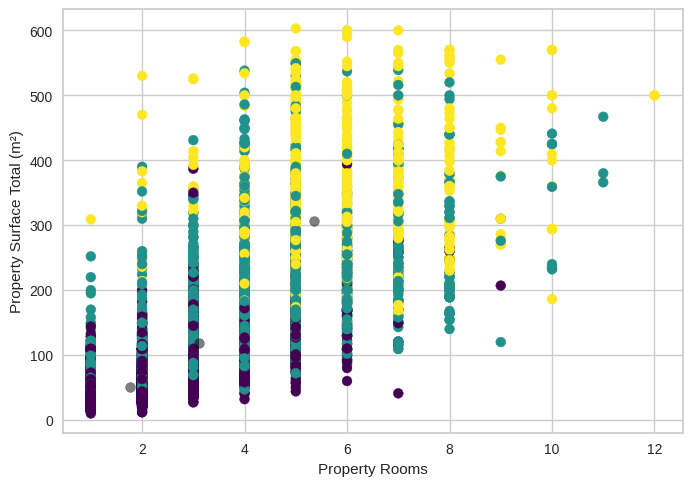

In [67]:
plt.xlabel("Property Rooms")
plt.ylabel("Property Surface Total (m²)")
plt.scatter(ds_properati_numerico.iloc[:, 2], ds_properati_numerico.iloc[:, 4], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')
plt.show()

Séptimo par: HABITACIONES VS BEDROOMS

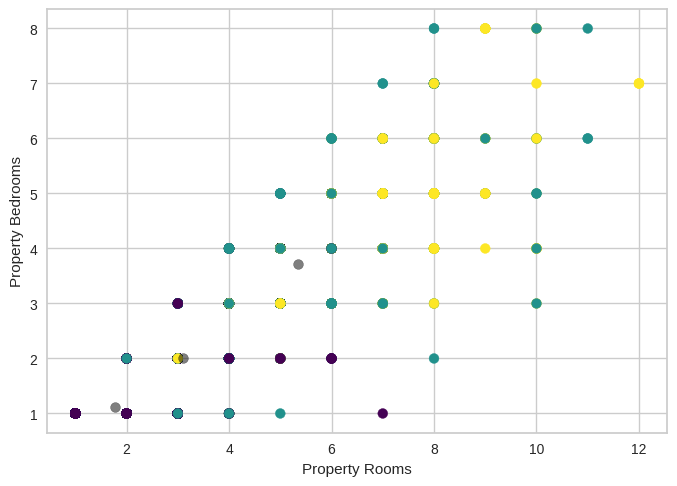

In [68]:
plt.xlabel("Property Rooms")
plt.ylabel("Property Bedrooms")
plt.scatter(ds_properati_numerico.iloc[:, 2], ds_properati_numerico.iloc[:, 3], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5,marker='.')
plt.show()


#### Graficamos sobre el mapa de Caba segun el grupo que pertenezcan 


In [ ]:
!pip install geopandas
import geopandas as gp

In [69]:

from seaborn import color_palette
#### VER COMO GRAFICAR POR CADA CLUSTER Y NO TODO JUNTO
def graficar_caba(index_variable1,index_variable2):
    fig, ax = plt.subplots(figsize=(15,15))
    poligonos = gp.read_file("barrios.geojson")
    ax.set_title('Barrios de CABA y clusters')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    poligonos.plot(ax=ax,column='BARRIO')
    # c = ['red', 'green', 'blue']
    # for i in range(1,4):
    #     points = gp.GeoDataFrame(ds_properati_numerico[y_kmeans == i].iloc[:,index_variable1], geometry=gp.points_from_xy(ds_properati_numerico[y_kmeans == i].longitud, ds_properati_numerico[y_kmeans == i].latitud))    
    #     points.plot(ax=ax, color=c[i-1],markersize=10 )
    plt.show()

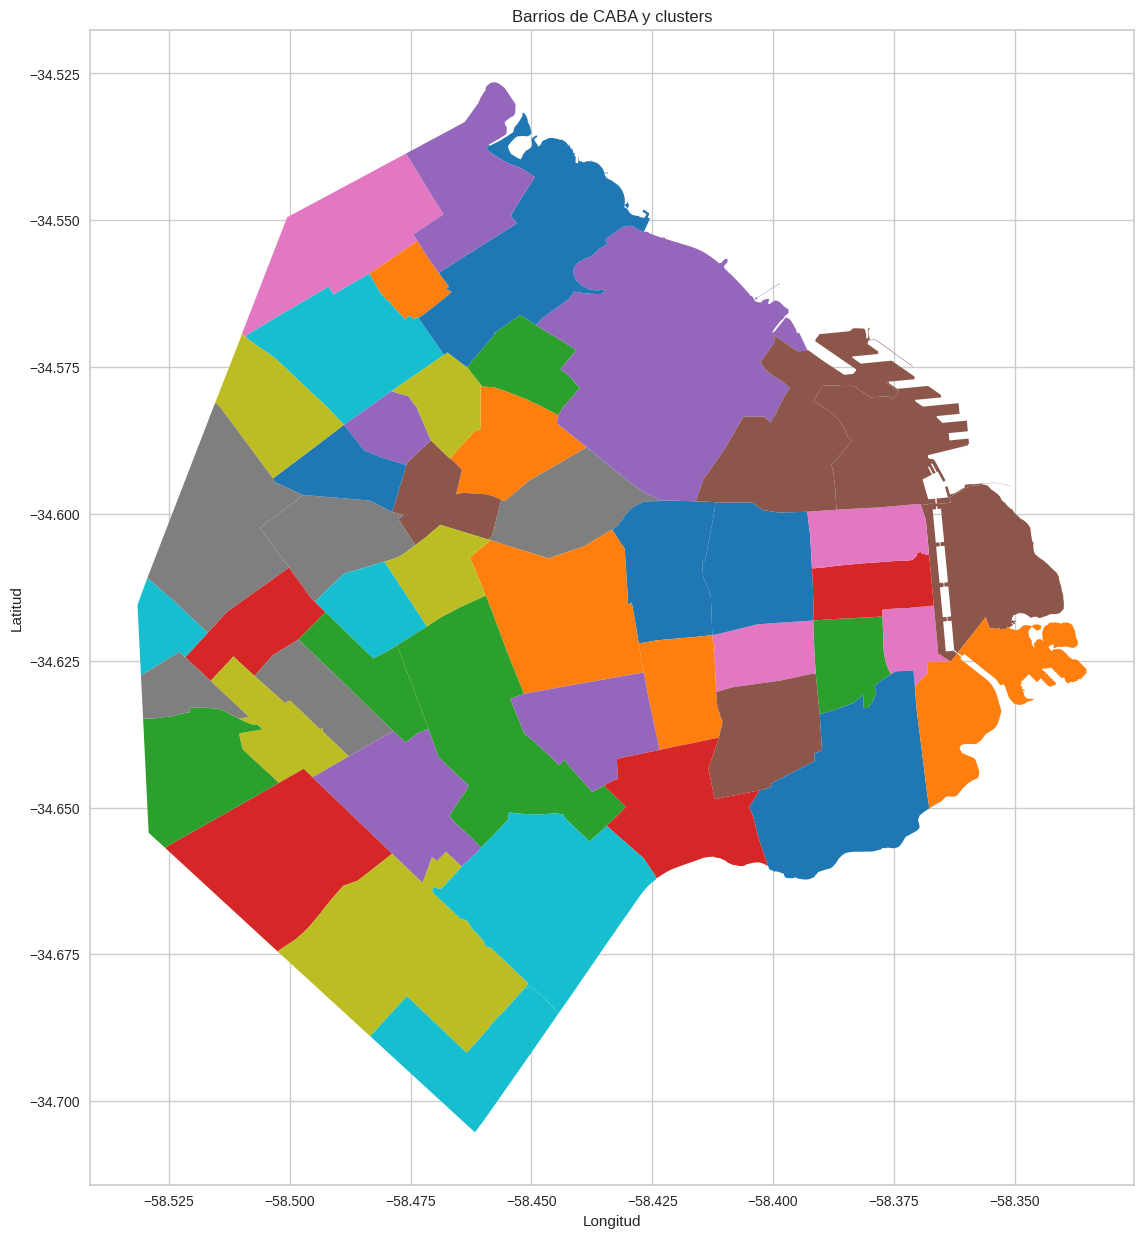

In [70]:
graficar_caba(6,5)